In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import ast 
import numpy as np
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')

df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']  = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 

df_DA = df[df['job_title_short'] == 'Data Analyst']

In [49]:
df_exploded = df_DA.explode(['job_skills']).copy()

In [50]:
df_exploded['month'] = df_exploded['job_posted_date'].dt.strftime('%b')
df_exploded['month_num'] = df_exploded['job_posted_date'].dt.month
df_exploded.sort_values(by='month_num',ascending= True, inplace=True)

In [51]:
df_pivot =df_exploded.pivot_table( index= ['month_num','month'] , columns='job_skills', aggfunc= 'size', fill_value=0)
df_pivot_final=df_pivot.droplevel('month_num')


In [52]:
df_pivot_final

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month,,,,,,,,,,,,,,,,,,,,,
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Sep,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [53]:
df_pivot_final.loc['total'] = df_pivot_final.sum()

In [54]:
df_pivot_final

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month,,,,,,,,,,,,,,,,,,,,,
Jan,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
Feb,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
Mar,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
Apr,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
May,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
Jun,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
Jul,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
Aug,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
Sep,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [55]:
df_pivot_final.loc['total'].sort_values(ascending=False).index

Index(['sql', 'excel', 'python', 'tableau', 'power bi', 'r', 'sas',
       'powerpoint', 'word', 'sap',
       ...
       'angular.js', 'xamarin', 'gtx', 'nuxt.js', 'ovh', 'esquisse', 'suse',
       'capacitor', 'chainer', 'msaccess'],
      dtype='object', name='job_skills', length=235)

In [56]:
df_pivot_final = df_pivot_final[df_pivot_final.loc['total'].sort_values(ascending=False).index]
df_pivot_final

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
month,,,,,,,,,,,,,,,,,,,,,
Jan,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
Feb,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
Mar,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
Apr,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
Jun,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
Jul,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
Aug,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
Sep,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df_pivot_final = df_pivot_final.drop('total')

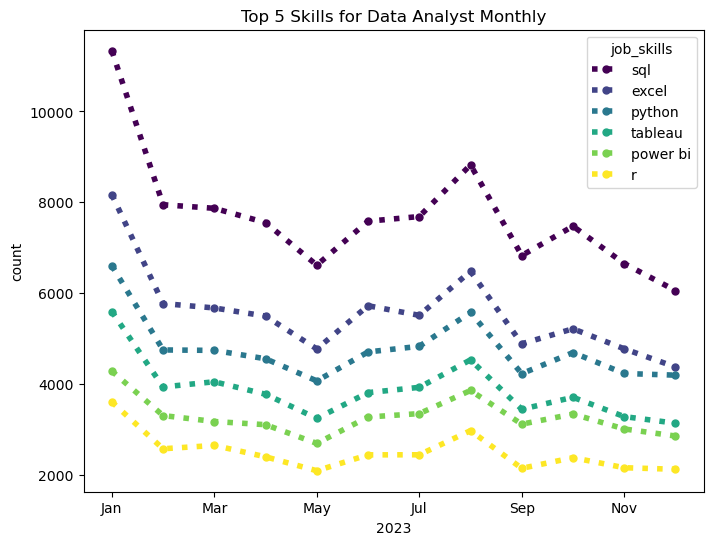

In [58]:
df_pivot_final = df_pivot_final.iloc[:,:6]
df_pivot_final.plot(
    kind='line',
    linewidth = 4,
    linestyle = ':', # - -- : -.
    colormap= 'viridis', # cheatsheet to know different types of color options
    marker = 'o', # o , x , + , - , * , , , ., 1, 2, 3, 4 ...
    markersize = 5,
    figsize= (8,6)
)

plt.title('Top 5 Skills for Data Analyst Monthly')
plt.ylabel('count')
plt.xlabel('2023')
plt.show()
plt.show()

# Scatter plot beautification

In [59]:
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month,month_num
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan,1
423333,Data Analyst,Full Time - Data Analyst,"New York, NY",via LinkedIn,Full-time,False,"New York, United States",2023-01-14 16:00:00,True,False,United States,None,NaN,NaN,CognoWiz...,azure,"{'analyst_tools': ['sap', 'tableau'], 'cloud':...",Jan,1
423333,Data Analyst,Full Time - Data Analyst,"New York, NY",via LinkedIn,Full-time,False,"New York, United States",2023-01-14 16:00:00,True,False,United States,None,NaN,NaN,CognoWiz...,aws,"{'analyst_tools': ['sap', 'tableau'], 'cloud':...",Jan,1
423333,Data Analyst,Full Time - Data Analyst,"New York, NY",via LinkedIn,Full-time,False,"New York, United States",2023-01-14 16:00:00,True,False,United States,None,NaN,NaN,CognoWiz...,gcp,"{'analyst_tools': ['sap', 'tableau'], 'cloud':...",Jan,1
423333,Data Analyst,Full Time - Data Analyst,"New York, NY",via LinkedIn,Full-time,False,"New York, United States",2023-01-14 16:00:00,True,False,United States,None,NaN,NaN,CognoWiz...,snowflake,"{'analyst_tools': ['sap', 'tableau'], 'cloud':...",Jan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592486,Data Analyst,Data analyst dataiku H/F,France,via LinkedIn,Full-time,False,France,2023-12-21 09:41:23,False,False,France,None,NaN,NaN,Meritis,None,None,Dec,12
254879,Data Analyst,Data Analyst,"Tampa, FL",via BeBee,Full-time,False,"Florida, United States",2023-12-29 07:01:22,False,True,United States,year,100000.0,NaN,WWC Global,r,"{'analyst_tools': ['tableau', 'power bi'], 'cl...",Dec,12
16744,Data Analyst,Data Analyst,United Kingdom,via LinkedIn,Full-time,False,United Kingdom,2023-12-03 13:07:47,False,False,United Kingdom,None,NaN,NaN,GradBay,sap,"{'analyst_tools': ['sheets', 'sap']}",Dec,12
592513,Data Analyst,Data Analyst,"San Jose, CA",via BeBee,Full-time,False,"California, United States",2023-12-13 09:01:29,True,False,United States,year,100000.0,NaN,TATA Consulting Services (USA),sql,"{'analyst_tools': ['sap'], 'cloud': ['azure'],...",Dec,12


In [60]:
size= 20

skill_salary_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_sal = ('salary_year_avg', 'median')
).sort_values(by='skill_count',ascending=False).head(size)

skill_salary_stats

,skill_count,median_sal
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


In [61]:

from adjustText import adjust_text

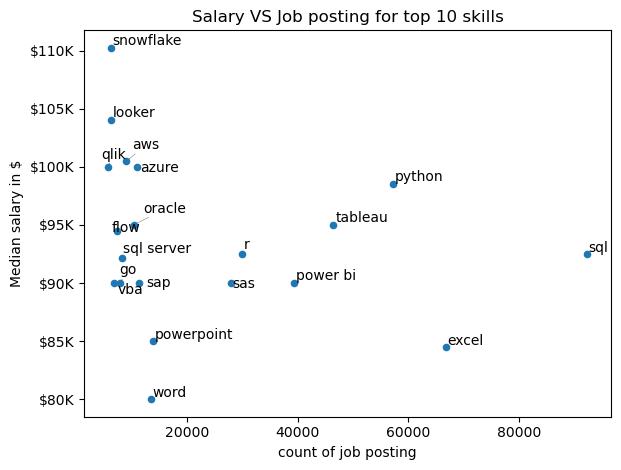

In [78]:


skill_salary_stats.plot(kind='scatter', x='skill_count', y='median_sal' )
plt.xlabel('count of job posting')
plt.ylabel('Median salary in $')
plt.title('Salary VS Job posting for top 10 skills')
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))
text=[]
for i, lab in enumerate(skill_salary_stats.index):
    text.append(plt.text(skill_salary_stats['skill_count'].iloc[i],skill_salary_stats['median_sal'].iloc[i], lab))

adjust_text(text, arrowprops=dict(arrowstyle="->",color = 'grey', lw=0.4))
plt.show()